In [1]:
#librerias
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import cholesky

In [2]:
#Integración numerica
def n_integral(f,n,a,b):
    valor=(f(a)+f(b))/2
    for k in range (1,n):
        valor=valor + f(a+k*(b-a)/n)
    valor=valor*(b-a)/n
    return valor

Problema 1: 

(1) Implementación

a)

In [3]:
n=100 #numero de discreticazión (modificable)
a=0 #Inicio del dominio (modificable)
b=1 # final del dominio (modificable)
def f(x): 
    #Función del problema (modificable)
    return -x**2+x+2

In [4]:
#Posición especifica de la discretización
def xi(i):
    return a+i*(b-a)/n

In [5]:
#funciones phi
def phi(x):
    if x>= xi(i-1) and x<= xi(i):
        return (x-xi(i-1))/(xi(i)-xi(i-1))
    if x>=xi(i) and x<=xi(i+1):
        return (xi(i+1)-x)/(xi(i+1)-xi(i))
    else:
        return 0
    
def derivada_phi(x):
    if x>= xi(i-1) and x<= xi(i):
        return 1/(xi(i)-xi(i-1))
    if x>=xi(i) and x<=xi(i+1):
        return -1/(xi(i+1)-xi(i))
    else:
        return 0

def phi_anterior(x):
    if x>= xi(i-2) and x<= xi(i-1):
        return (x-xi(i-2))/(xi(i-1)-xi(i-2))
    if x>=xi(i-1) and x<=xi(i):
        return (xi(i)-x)/(xi(i)-xi(i-1))
    else:
        return 0
    
def derivada_phi_anterior(x):
    if x>= xi(i-2) and x<= xi(i-1):
        return 1/(xi(i-1)-xi(i-2))
    if x>=xi(i-1) and x<=xi(i):
        return -1/(xi(i)-xi(i-1))
    else:
        return 0

def phi_superior(x):
    if x>= xi(i) and x<= xi(i+1):
        return (x-xi(i))/(xi(i+1)-xi(i))
    if x>=xi(i+1) and x<=xi(i+2):
        return (xi(i+2)-x)/(xi(i+2)-xi(i+1))
    else:
        return 0
    
def derivada_phi_superior(x):
    if x>= xi(i) and x<= xi(i+1):
        return 1/(xi(i+1)-xi(i))
    if x>=xi(i+1) and x<=xi(i+2):
        return -1/(xi(i+2)-xi(i+1))
    else:
        return 0

def ai(x):
    return derivada_phi(x)**2+phi(x)**2
def bi(x):
    return derivada_phi(x)*derivada_phi_anterior(x)+phi(x)*phi_anterior(x)
def bi_superior(x):
    return derivada_phi(x)*derivada_phi_superior(x)+phi(x)*phi_superior(x)
def fi(x):
    return f(x)*phi(x)

In [6]:
M=np.zeros((n-1,n-1)) #Matriz en los que pondremos los valores de nuestro sistema
F=np.zeros((n-1,1)) #Vector de valore de f_i
for i in range(1,n):
    F[i-1,0]=n_integral(fi,1000,a,b)
    M[i-1,i-1]=n_integral(ai,1000,a,b)
    if i!=1:
        M[i-1,i-2]=n_integral(bi,1000,a,b)
    if i!= n-1:
        M[i-1,i]=n_integral(bi_superior,1000,a,b)

In [7]:
F

array([[0.02009883],
       [0.02019583],
       [0.02029084],
       [0.02038384],
       [0.02047484],
       [0.02056383],
       [0.02065084],
       [0.02073583],
       [0.02081884],
       [0.02089984],
       [0.02097883],
       [0.02105584],
       [0.02113084],
       [0.02120384],
       [0.02127483],
       [0.02134383],
       [0.02141084],
       [0.02147583],
       [0.02153883],
       [0.02159984],
       [0.02165884],
       [0.02171583],
       [0.02177084],
       [0.02182383],
       [0.02187483],
       [0.02192383],
       [0.02197084],
       [0.02201584],
       [0.02205883],
       [0.02209983],
       [0.02213883],
       [0.02217584],
       [0.02221083],
       [0.02224384],
       [0.02227483],
       [0.02230384],
       [0.02233084],
       [0.02235583],
       [0.02237884],
       [0.02239983],
       [0.02241884],
       [0.02243583],
       [0.02245084],
       [0.02246383],
       [0.02247484],
       [0.02248383],
       [0.02249084],
       [0.022

In [8]:
M

array([[205.0067 , -89.99835,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [-89.99835, 210.0067 , -89.99835, ...,   0.     ,   0.     ,
          0.     ],
       [  0.     , -89.99835, 210.0067 , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ..., 210.0067 , -89.99835,
          0.     ],
       [  0.     ,   0.     ,   0.     , ..., -89.99835, 210.0067 ,
        -89.99835],
       [  0.     ,   0.     ,   0.     , ...,   0.     , -89.99835,
        205.0067 ]])

In [9]:
#Método de Cholesky
L=np.zeros((n-1,n-1)) #Matriz en los que pondremos los valores de nuestro sistema
L[0,0]=M[0,0]**(1/2)
suma=0
suma_diag=0
for i in range(1,n-1):
    for j in range (0,i):
        suma_diag=suma_diag +L[i,j]**2
        for k in range (0,j):
            suma=suma +L[i,k]*L[j,k]
        L[i,j]=(M[i,j]-suma)/L[j,j]
        suma=0
    L[i,i]=(M[i,i]-suma_diag)**(1/2)
    suma_diag=0    

In [10]:
L

array([[14.31805504,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-6.2856547 , 14.49160792,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -6.2103771 , 14.49160792, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 14.49160792,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -6.2103771 ,
        14.49160792,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -6.2103771 , 14.31805504]])

In [11]:
#Resolveremos ahora Ly=F
y=np.zeros((n-1,1))
y[0,0]=F[0,0]/L[0,0]
suma=0
for i in range(1,n-1):
    for j in range(0,i):
        suma=suma+L[i,j]*y[j,0]
    y[i,0]=(F[i,0]-suma)/L[i,i]
    suma=0


In [12]:
y

array([[0.00140374],
       [0.00200249],
       [0.00225834],
       [0.00237441],
       [0.00243043],
       [0.00246058],
       [0.0024795 ],
       [0.00249348],
       [0.00250519],
       [0.0025158 ],
       [0.0025258 ],
       [0.0025354 ],
       [0.00254469],
       [0.00255371],
       [0.00256247],
       [0.00257099],
       [0.00257926],
       [0.00258729],
       [0.00259508],
       [0.00260263],
       [0.00260993],
       [0.002617  ],
       [0.00262382],
       [0.0026304 ],
       [0.00263674],
       [0.00264284],
       [0.0026487 ],
       [0.00265431],
       [0.00265968],
       [0.00266482],
       [0.00266971],
       [0.00267436],
       [0.00267876],
       [0.00268293],
       [0.00268685],
       [0.00269054],
       [0.00269398],
       [0.00269718],
       [0.00270014],
       [0.00270285],
       [0.00270533],
       [0.00270756],
       [0.00270956],
       [0.00271131],
       [0.00271282],
       [0.00271408],
       [0.00271511],
       [0.002

In [13]:
#Resolveremos ahora  L^{T}x=y
LT=np.transpose(L)
x=np.zeros((n-1,1))
x[n-2,0]=F[n-2,0]/LT[n-2,n-2]
suma=0
for i in reversed(range(0,n-2)):
    for j in reversed(range(i+1,n-1)):
        suma=suma+LT[i,j]*x[j,0]
    x[i,0]=(F[i,0]-suma)/L[i,i]
    suma=0

In [14]:
x

array([[0.00247807],
       [0.00244722],
       [0.00245851],
       [0.00246955],
       [0.00248036],
       [0.00249093],
       [0.00250125],
       [0.00251134],
       [0.00252118],
       [0.00253078],
       [0.00254014],
       [0.00254925],
       [0.00255813],
       [0.00256676],
       [0.00257516],
       [0.00258331],
       [0.00259122],
       [0.00259888],
       [0.00260631],
       [0.0026135 ],
       [0.00262044],
       [0.00262714],
       [0.0026336 ],
       [0.00263982],
       [0.0026458 ],
       [0.00265153],
       [0.00265703],
       [0.00266228],
       [0.00266729],
       [0.00267206],
       [0.00267659],
       [0.00268088],
       [0.00268492],
       [0.00268873],
       [0.00269229],
       [0.00269561],
       [0.00269869],
       [0.00270153],
       [0.00270412],
       [0.00270648],
       [0.00270859],
       [0.00271046],
       [0.00271209],
       [0.00271348],
       [0.00271463],
       [0.00271553],
       [0.0027162 ],
       [0.002

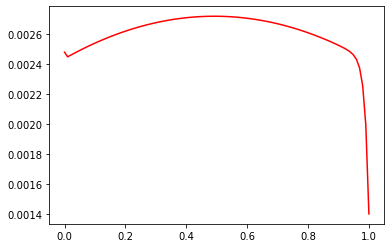

In [15]:
X = np.linspace(a, b, n-1)
plt.plot(X,x, color="red")
plt.show()